In [1]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("D:/Rifaldi Raja/Robust Reg/train.csv")
test = pd.read_csv("D:/Rifaldi Raja/Robust Reg/test.csv")
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


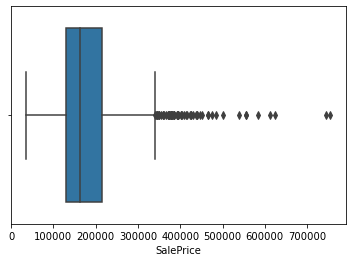

In [3]:
s1 = sns.boxplot(train['SalePrice'], showfliers=True, )
plt.show()

In [4]:
q1 = np.percentile(train["SalePrice"],25)
q3 = np.percentile(train["SalePrice"],75)
iqr = q3-q1
iqr

84025.0

In [5]:
upper = q3+1.5*iqr
lower = q1-1.5*iqr
lower, upper

(3937.5, 340037.5)

In [6]:
train[(train["SalePrice"]>upper) | (train["SalePrice"]<lower)].shape[0]

61

In [7]:
#Menghitung Z-Score
z = (train["SalePrice"] - np.mean(train["SalePrice"]))/np.std(train["SalePrice"])
(np.absolute(z)>2.5).sum()

40

In [8]:
z

0       0.347273
1       0.007288
2       0.536154
3      -0.515281
4       0.869843
          ...   
1455   -0.074560
1456    0.366161
1457    1.077611
1458   -0.488523
1459   -0.420841
Name: SalePrice, Length: 1460, dtype: float64